In [ ]:
SQL PROJECT(DIGIKULL)

DATASET=CRIME IN INDIA (https://www.kaggle.com/rajanand/crime-in-india/code)
  
  QUESTION--
1. What is the major reason people being kidnapped in each and every state?
2. Offenders relation to the rape victim
3. Juveniles family background, education and economic setup.
4. Which state has more crime against children and women?
5. Age group wise murder victim
6. Crime by place of occurrence.
7. Anti corruption cases vs arrests.
8. Which state has more number of complaints against police?
9. Which state is the safest for foreigners?

In [ ]:
import pandas as pd
import sqlite3 as sq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
conn=sq.connect('Assignment.db')

In [ ]:
c = conn.cursor()

##  Q1.What is the major reason people being kidnapped in each and every state?

In [ ]:
df = pd.read_sql_query("SELECT * from(select Area_Name,Group_Name,sum(Cases_Reported) as total_case from Specific_purpose_of_kidnapping_and_abduction GROUP by Area_Name, Group_Name order by sum(Cases_Reported) DESC) group by Area_Name order by total_case desc;", conn)

In [ ]:
df

,Area_Name,Group_Name,total_case
0,Andaman & Nicobar Islands,Kidnap - For Marriage,9.0
1,Dadra & Nagar Haveli,Kidnap - For Revenge,1.0
2,Goa,Kidnap - For Unlawful Activity,1.0
3,Lakshadweep,Kidnap - For Ransom,1.0
4,Rajasthan,Kidnap - For Sale,1.0
5,Sikkim,Kidnap - For Slavery,1.0
6,Uttarakhand,Kidnap - For Begging,1.0
7,Andhra Pradesh,Kidnap - For Selling Bodyparts,0.0
8,Arunachal Pradesh,Kidnap - For Slavery,0.0
9,Assam,Kidnap - For Camel Racing,0.0


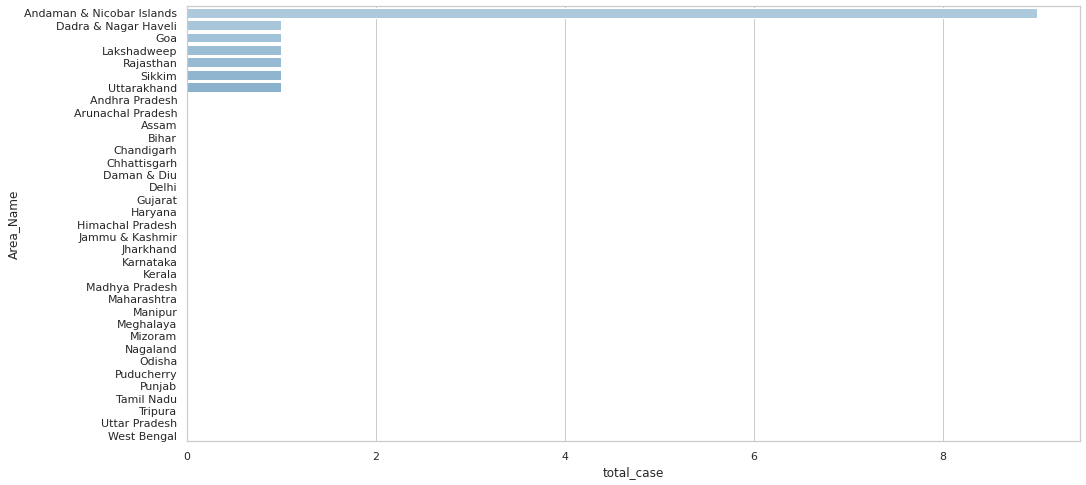

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x="total_case", y="Area_Name", data=kidnap,
                 palette="Blues_d")




##   Q2.Offenders relation to the rape victim

In [ ]:
offender_relation=pd.read_sql_query("SELECT sum(No_of_Cases_in_which_offenders_were_Neighbours) as Neighbour,sum(No_of_Cases_in_which_offenders_were_Other_Known_persons) as known,\
sum(No_of_Cases_in_which_offenders_were_Parentsclose_family_members) as Parentsclose_family_members ,sum(No_of_Cases_in_which_offenders_were_Relatives) as offenders_were_Relatives,\
sum(No_of_Cases_in_which_offenders_were_known_to_the_Victims) as known_to_the_Victims from Offenders_known_to_the_victim",conn)

In [ ]:
offender=offender_relation.transpose().reset_index().rename(columns={"index":"Relation",0: 'Total'})


In [ ]:
offender

,Relation,Total
0,Neighbour,58239
1,known,94755
2,Parentsclose_family_members,4216
3,offenders_were_Relatives,11242
4,known_to_the_Victims,168454


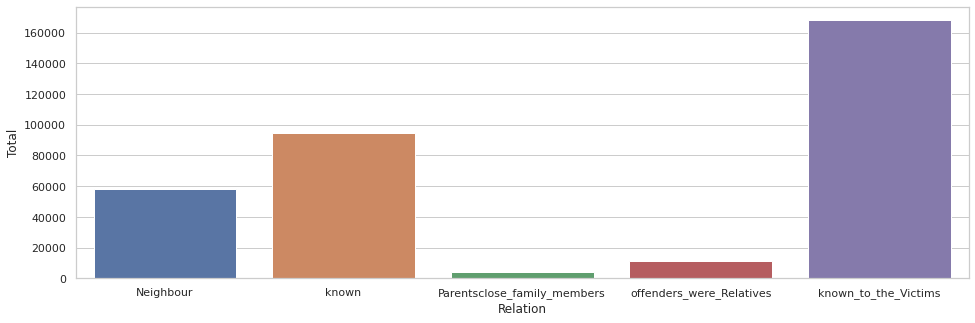

In [ ]:
plt.figure(figsize=(16,5))
font={'color':'Black','weight':'bold','size': 16}
from numpy import median
ax = sns.barplot(x="Relation", y="Total", data=offender, estimator=median)


In [ ]:
As per the above observation  most number of offenders were known to victims with number as high as 168454 and in the second place comes the neighbours.

## Q3.Juveniles family background, education and economic setup.

In [ ]:
Juvinials_data = pd.read_sql_query("SELECT  d.Area_Name , e.income_upto_25k , e.income_25k_50k , e.income_50k_1L ,e.income_1L_2L , e.income_2L_3l , e.income_above_3L , f.homless , f.living_wd_guardians , f.living_wd_parents , d.illetrate , d.upto_Primary , d.below_higerSecondary , d.higher_secondary_above FROM   (SELECT sum(Family_back_ground_Homeless) as homless,      \
  sum(Family_back_ground_Living_with_guardian) as living_wd_guardians,      \
  sum(Family_back_ground_Living_with_parents) as living_wd_parents ,      \
  Area_Name\
  FROM EBJuveniles_arrested_Family_background       \
  GROUP BY Area_Name ) as f   \
  join \
  (SELECT    \
  sum(Economic_Set_up_Annual_Income_250001_to_50000) as income_25k_50k,      \
  sum(Economic_Set_up_Annual_Income_upto_Rs_25000) as income_upto_25k,      \
  sum(Economic_Set_up_Middle_income_from_100001_to_200000) as income_1L_2L,      \
  sum(Economic_Set_up_Middle_income_from_50001_to_100000) as income_50k_1L ,      \
  sum(Economic_Set_up_Upper_income_above_Rs_300000)as income_above_3L,      \
  sum(Economic_Set_up_Upper_middle_income_from_200001_to_300000)as income_2L_3l,      \
  Area_Name       \
  FROM ESJuveniles_arrested_Economic_setup       \
  GROUP BY Area_Name      \
  ) as e      \
  ON      \
  f.Area_Name = e.Area_Name       \
  JOIN      \
  (SELECT sum(Education_Illiterate) as illetrate ,      \
  sum(Education_Upto_primary) as upto_Primary,      \
  sum(Education_Above_Primary_but_below_Matric_or_Higher_Secondary) as below_higerSecondary,      \
  sum('Education_Matric_or_Higher_Secondary_&_above') as higher_secondary_above,      \
  Area_Name      \
  FROM EJuveniles_arrested_Education      \
  GROUP BY Area_Name      \
  ) as d      \
  ON      \
  e.Area_Name = d.Area_Name",conn)

In [ ]:
Juvinials_data

,Area_Name,income_upto_25k,income_25k_50k,income_50k_1L,income_1L_2L,income_2L_3l,income_above_3L,homless,living_wd_guardians,living_wd_parents,illetrate,upto_Primary,below_higerSecondary,higher_secondary_above
0,Andaman & Nicobar Islands,74,200,53,12,0,0,0,37,302,1,142,175,0.0
1,Andhra Pradesh,14487,3870,1311,213,17,16,5234,3061,11619,8280,6741,3629,0.0
2,Arunachal Pradesh,390,543,230,30,0,0,1,505,687,199,431,477,0.0
3,Assam,3256,1101,343,162,60,31,647,1624,2682,1664,1456,1242,0.0
4,Bihar,3669,2214,767,204,12,5,553,1256,5062,2229,2116,2098,0.0
5,Chandigarh,503,348,263,57,6,0,35,55,1087,274,306,475,0.0
6,Chhattisgarh,14576,4506,2014,653,278,77,765,3125,18214,5642,8651,6290,0.0
7,Dadra & Nagar Haveli,65,37,10,2,0,0,0,0,114,16,51,31,0.0
8,Daman & Diu,20,15,10,2,1,0,4,11,33,13,4,18,0.0
9,Delhi,6664,1903,548,85,17,13,746,1748,6736,3648,2801,2233,0.0


In [ ]:
here we can analyse that most juvenils were having very low income bracket and were mostly having low educational background i.e less then higher secondary.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1106: UserWarning: Dataset has 0 variance; skipping dens

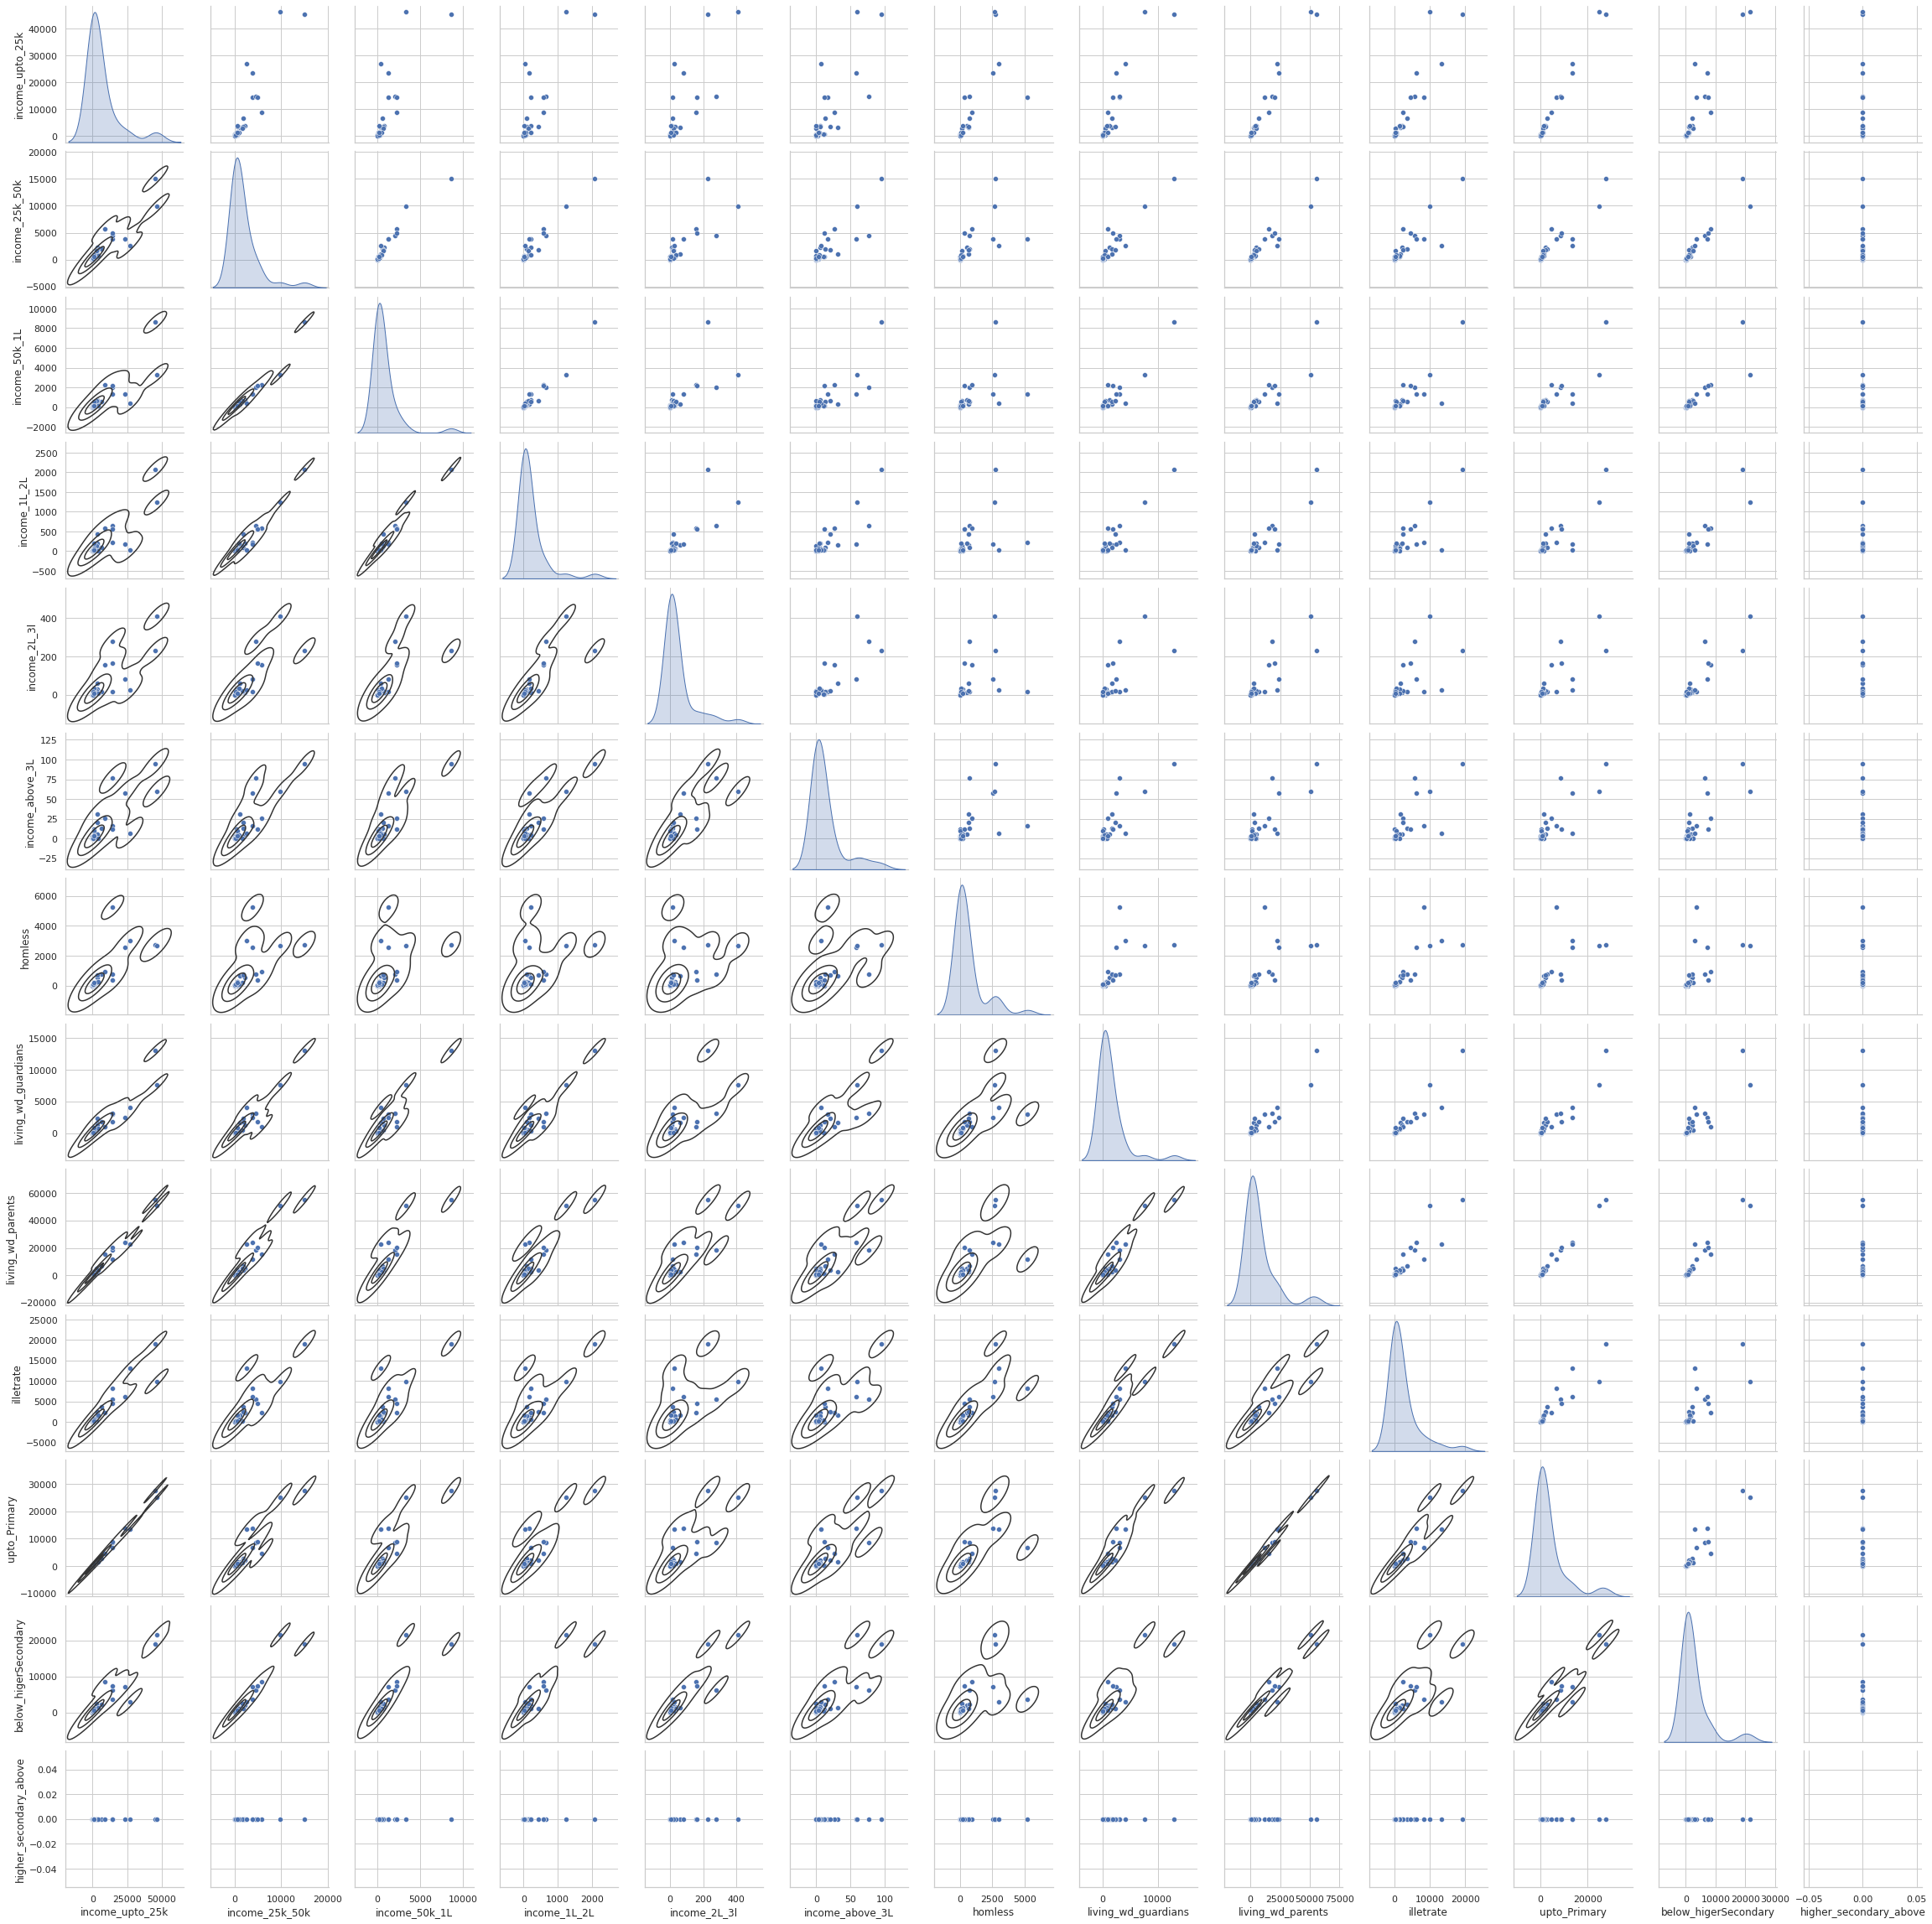

In [ ]:
g = sns.pairplot(Juvinials_data, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

## Q4.Which state has more crime against children and women?

###  Top 5 States with Higher Crime Aganist  Women & Children Combined

In [ ]:
state_crime_children_women=pd.read_sql_query("SELECT c.STATE_UT,(w.total_crime_on_women+c.total_crime_on_children) as Total_Crime from(SELECT STATE_UT,(sum(rape)+sum(KidnappingandAbduction)+sum(DowryDeaths)+sum(Assaultonwomenwithintenttooutragehermodesty)+sum(InsulttomodestyofWomen)+sum(CrueltybyHusbandorhisRelatives)+sum(ImportationofGirls)) as total_crime_on_women from District_wise_crimes_committed_against_women_2001_2012 GROUP by STATE_UT order by total_crime_on_women DESC) as W join (SELECT STATE_UT,sum(total) as total_crime_on_children from District_wise_crimes_committed_against_children_2001_2012 GROUP by STATE_UT order by sum(total) desc)as C on c.STATE_UT=W.STATE_UT ORDER by (w.total_crime_on_women+c.total_crime_on_children) DESC limit 5;",conn)

In [ ]:
state_crime_children_women


,STATE_UT,Total_Crime
0,UTTAR PRADESH,296305
1,ANDHRA PRADESH,274942
2,MADHYA PRADESH,274360
3,MAHARASHTRA,227384
4,WEST BENGAL,216455


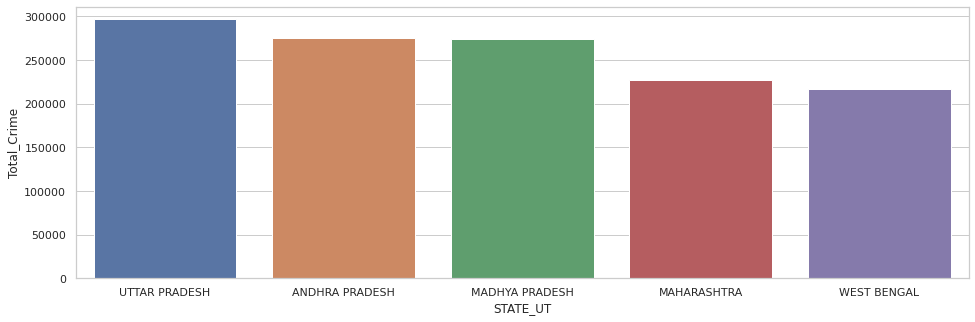

In [ ]:
plt.figure(figsize=(16,5))
font={'color':'Black','weight':'bold','size': 16}
ax = sns.barplot(x="STATE_UT", y="Total_Crime", data=state_crime_children_women)

In [ ]:
from the above data it is clearly visible here here that uttar pradesh has the highest crime rate against children and woman

### Top 5 States With Higher Crime Aganist  Children

In [ ]:
state_crime_children = pd.read_sql_query("SELECT STATE_UT,sum(total) as Total_Crime_On_Children from District_wise_crimes_committed_against_children_2001_2012 GROUP by STATE_UT order by sum(total) desc limit 5;",conn)


In [ ]:
state_crime_children


,STATE_UT,Total_Crime_On_Children
0,MADHYA PRADESH,90770
1,UTTAR PRADESH,72004
2,MAHARASHTRA,62602
3,DELHI,50049
4,ANDHRA PRADESH,33158


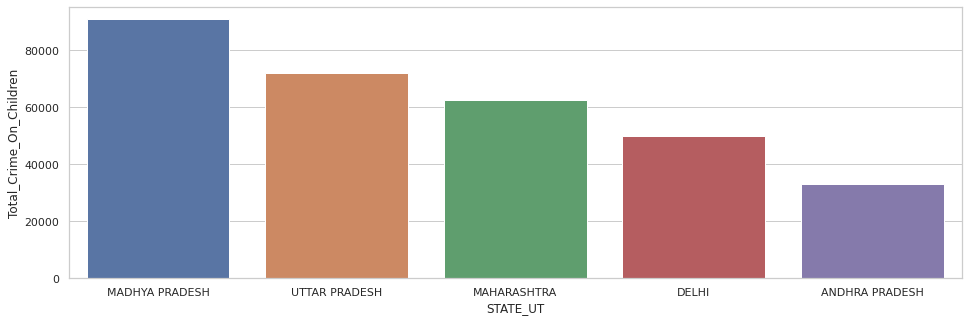

In [ ]:
plt.figure(figsize=(16,5))
font={'color':'Black','weight':'bold','size': 16}
from numpy import median
ax = sns.barplot(x="STATE_UT", y="Total_Crime_On_Children", data=state_crime_children, estimator=median)

In [ ]:
here we can analye from the above plot that Madhya pradesh have the highest number of crimes  against children i.e  90770

###  Top 5 States With Higher Crime Aganist Women

In [ ]:
state_crime_women = pd.read_sql_query("SELECT STATE_UT, (sum(rape)+sum(KidnappingandAbduction)+sum(DowryDeaths)+sum(Assaultonwomenwithintenttooutragehermodesty)+sum(InsulttomodestyofWomen)+sum(CrueltybyHusbandorhisRelatives)+sum(ImportationofGirls)) as Total_Crime_On_Women from District_wise_crimes_committed_against_women_2001_2012 GROUP by STATE_UT order by total_crime_on_women DESC limit 5;",conn)


In [ ]:
state_crime_women

,STATE_UT,Total_Crime_On_Women
0,ANDHRA PRADESH,241784
1,UTTAR PRADESH,224301
2,WEST BENGAL,202939
3,MADHYA PRADESH,183590
4,RAJASTHAN,176849


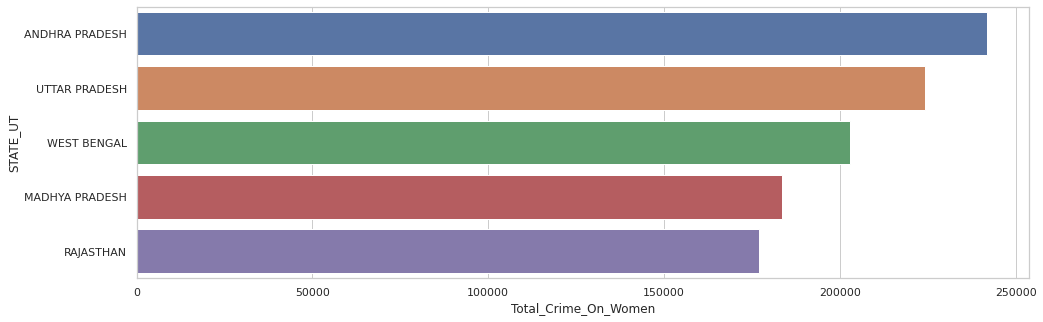

In [ ]:
plt.figure(figsize=(16,5))
font={'color':'Black','weight':'bold','size': 16}
ax = sns.barplot(x="Total_Crime_On_Women", y="STATE_UT", data=state_crime_women, ci=68)

In [ ]:
here we can analye from the above plot that Andrapradesh have the highest number of crimes  against woman i.e 2.4 lakhs

## Q5. Age group wise murder victim

In [ ]:
age_group_Victim=pd.read_sql_query("select sum(Victims_Above_50_Yrs)as total_Above_50Yrs,sum(Victims_Upto_10_15_Yrs) as total_Victims_between_10to15Yrs,sum(Victims_Upto_10_Yrs) as total_Victims_Upto_10_Yrs,sum(Victims_Upto_15_18_Yrs) as total_Victims_Upto_15_18_Yrs,sum(Victims_Upto_18_30_Yrs) as total_Victims_Upto_18_30_Yrs,sum(Victims_Upto_30_50_Yrs) as total_Victims_Upto_30_50_Yrs from Murder_victim_age_sex ;",conn)

In [ ]:
age_group_Victim.transpose().reset_index().rename(columns={"index":"Age Group",0: 'Total'})

,Age Group,Total
0,total_Above_50Yrs,64992.0
1,total_Victims_between_10to15Yrs,8354.0
2,total_Victims_Upto_10_Yrs,13254.0
3,total_Victims_Upto_15_18_Yrs,15386.0
4,total_Victims_Upto_18_30_Yrs,317572.0
5,total_Victims_Upto_30_50_Yrs,276150.0


<Figure size 1440x1800 with 0 Axes>

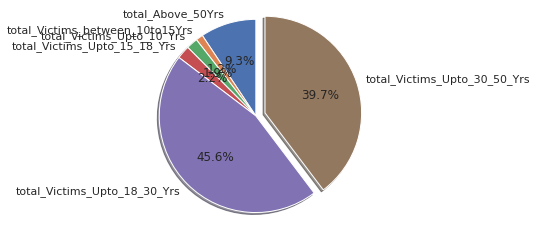

In [ ]:
plt.figure(figsize=(20,25))
font={'color':'Black','weight':'bold','size': 50}
labels = 'total_Above_50Yrs', 'total_Victims_between_10to15Yrs', 'total_Victims_Upto_10_Yrs', 'total_Victims_Upto_15_18_Yrs','total_Victims_Upto_18_30_Yrs','total_Victims_Upto_30_50_Yrs'
sizes = [64992.0,8354.0,13254.0,15386.0,317572.0,276150.0]
explode = (0, 0, 0, 0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%2.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
here from the above data its claerly visible that most murder victims fall  in the age bracket of 18-30yrs, followd by  age group of 30-50yrs

## Q6. Crime by place of occurrence.

In [ ]:
crime_by_place_of_occurence=pd.read_sql_query("SELECT sum(RESIDENTIALPREMISES_Dacoity) as Total_RESIDENTIALPREMISES_Dacoity,sum(RESIDENTIALPREMISES_Robbery) as Total_RESIDENTIALPREMISES_Robbery,sum(RESIDENTIALPREMISES_Theft)as Total_RESIDENTIALPREMISES_Theft,sum(RESIDENTIALPREMISES_Burglary) as Total_RESIDENTIALPREMISES_Burglary,sum(HIGHWAYS_Burglary) as Total_HIGHWAYS_Burglary,sum(HIGHWAYS_Dacoity)as Total_HIGHWAYS_Dacoity,sum(HIGHWAYS_Robbery) as Total_HIGHWAYS_Robbery,sum(HIGHWAYS_Theft)as Total_HIGHWAYS_Theft,sum(RIVERandSEA_Theft) as Total_RIVERandSEA_Theft,sum(RIVERandSEA_Burglary) as Total_RIVERandSEA_Burglary,sum(RIVERandSEA_Dacoity) as Total_RIVERandSEA_Dacoity,sum(RIVERandSEA_Robbery) as Total_RIVERandSEA_Robbery,sum(RAILWAYS_Burglary) as Total_RAILWAYS_Burglary,sum(RAILWAYS_Dacoity) as Total_RAILWAYS_Dacoity,sum(RAILWAYS_Robbery) as Total_RAILWAYS_Robbery,sum(RAILWAYS_Theft) as Total_RAILWAYS_Theft,sum(BANKS_Burglary)as Total_BANKS_Burglary ,sum(BANKS_Dacoity) as Total_BANKS_Dacoity,sum(BANKS_Robbery) as Total_BANKS_Robbery,sum(BANKS_Theft) as Total_BANKS_Theft,sum(COMMERCIALESTABLISHMENTS_Burglary) as Total_COMMERCIALESTABLISHMENTS_Burglary,sum(COMMERCIALESTABLISHMENTS_Dacoity) as Total_COMMERCIALESTABLISHMENTS_Dacoity,sum(COMMERCIALESTABLISHMENTS_Robbery) as Total_COMMERCIALESTABLISHMENTS_Robbery,sum(COMMERCIALESTABLISHMENTS_Theft)as Total_COMMERCIALESTABLISHMENTS_Theft,sum(OTHERPLACES_Burglary)as Total_OTHERPLACES_Burglary,sum(OTHERPLACES_Dacoity) as Total_OTHERPLACES_Dacoity,sum(OTHERPLACES_Robbery) as Total_OTHERPLACES_Robbery,sum(OTHERPLACES_Theft) as Total_OTHERPLACES_Theft from Crime_by_place_of_occurrence_2001_2012 ;",conn)

In [ ]:
crime_by_place_of_occurence.transpose().reset_index().rename(columns={"index":"Crime Location",0: 'Total'})


,Crime Location,Total
0,Total_RESIDENTIALPREMISES_Dacoity,69427
1,Total_RESIDENTIALPREMISES_Robbery,111504
2,Total_RESIDENTIALPREMISES_Theft,2681928
3,Total_RESIDENTIALPREMISES_Burglary,2140621
4,Total_HIGHWAYS_Burglary,10200
5,Total_HIGHWAYS_Dacoity,29733
6,Total_HIGHWAYS_Robbery,151803
7,Total_HIGHWAYS_Theft,456314
8,Total_RIVERandSEA_Theft,6810
9,Total_RIVERandSEA_Burglary,512


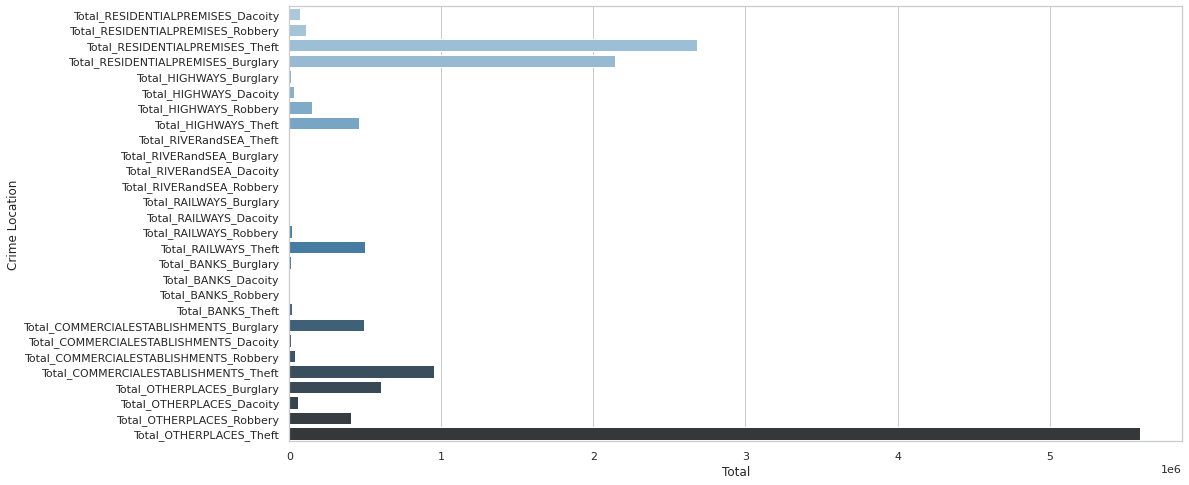

In [ ]:
plt.figure(figsize=(16,8))

ax = sns.barplot(x="Total", y="Crime Location", data=crime_by_place_of_occurence.transpose().reset_index().rename(columns={"index":"Crime Location",0: 'Total'}),
                 palette="Blues_d")

In [ ]:
From the above plot we can see that the most crimes  took place in residences in the form of theft other then the unlist places which amounts to the highest no.of crimes as per place off occurence

## Q7. Anti corruption cases vs arrests.

In [ ]:
Anti_corruption_cases_vs_arrests = pd.read_sql_query("SELECT a.Area_Name, a.Year, a.ACA01_No_of_persons_in_custody_or_on_bail_during_the_stage_of_investigation_at_the_beginning_of_the_year as Toatl_Jail, c.AC02_No_of_cases_registered_during_the_year as Total_Case FROM Anti_corruption_arrests a join Anti_corruprion_cases c USING(Area_Name) group by a.Area_Name",conn)


In [ ]:
Anti_corruption_cases_vs_arrests


,Area_Name,Year,Toatl_Jail,Total_Case
0,Andaman & Nicobar Islands,2009,12.0,5.0
1,Andhra Pradesh,2001,92.0,345.0
2,Arunachal Pradesh,2010,1.0,7.0
3,Assam,2010,11.0,26.0
4,Bihar,2002,10.0,133.0
5,Chandigarh,2003,37.0,13.0
6,Chhattisgarh,2007,70.0,55.0
7,Dadra & Nagar Haveli,2010,0.0,1.0
8,Daman & Diu,2010,0.0,1.0
9,Delhi,2010,226.0,82.0


In [ ]:
plt.figure(figsize=(16,8))

ax = sns.barplot(x="Total", y="Crime Location", data=crime_by_place_of_occurence.transpose().reset_index().rename(columns={"index":"Crime Location",0: 'Total'}),
                 palette="Blues_d")

## Q8. Which state has more number of complaints against police?

In [ ]:
cases_agnist_police=pd.read_sql_query("select Area_Name,Year,Cases_Registered from Complaints_against_police GROUP by Area_Name order by Cases_Registered DESC LIMIT 5;",conn)

In [ ]:
cases_agnist_police


,Area_Name,Year,Cases_Registered
0,Uttar Pradesh,2010,8701
1,Maharashtra,2010,413
2,Gujarat,2010,274
3,Rajasthan,2010,193
4,Kerala,2010,118


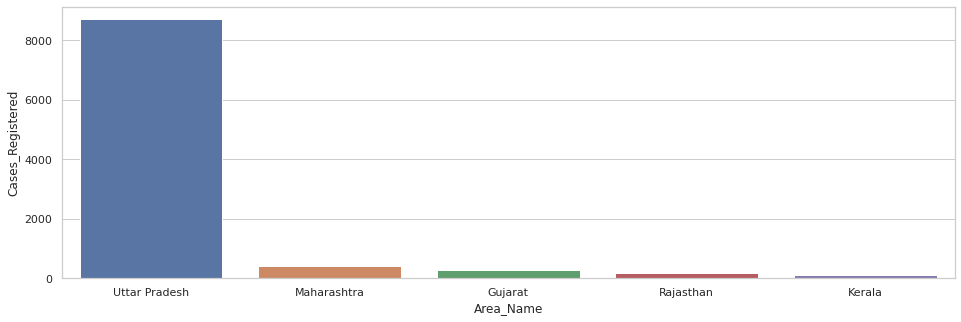

In [ ]:
plt.figure(figsize=(16,5))
font={'color':'Black','weight':'bold','size': 16}
ax = sns.barplot(x="Area_Name", y="Cases_Registered", data=cases_agnist_police, ci=68)

In [ ]:
here we can conclude from the analysis that Uttar Pradesh  has the highest number of complaints against police .

## Q9.Which state is the safest for foreigners?

In [ ]:
safest_foreginers=pd.read_sql_query("SELECT STATE_UT,TOTALIPCCRIMES FROM District_wise_crimes_committed_IPC_2001_2012 GROUP by STATE_UT order by TOTALIPCCRIMES  ;",conn)

In [ ]:
safest_foreginers.head()


,STATE_UT,TOTALIPCCRIMES
0,LAKSHADWEEP,60
1,DAMAN & DIU,239
2,D & N HAVELI,318
3,SIKKIM,528
4,A & N ISLANDS,683


In [ ]:
here we can conclude that the safest place for the forreigner is andaman and nicobar islands and the least safest being lakhadweep island.